#### Ques1. What is Clustering? How clustering helps in performing the EDA? 

Ans. First, cluster is the collection of data objects which are similar to one another within the same group (class or category) and are different from the objects in the other clusters. Clustering is an unsupervised learning technique in which there is predefined classes and prior information which defines how the data should be grouped or labeled into separate classes

Exploratory Data Analysis (EDA) process helps us to discover hidden patterns of interest or structure in data. 
Clustering can also work as a EDA tool to get the insights about the data distribution or as a preprocessing step in other algorithms.

#### Ques2. What is the difference between K Means & Agglomerative Clustering. Explain it using some data in Jupyter Notebook through Coding.

1. In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering like Agglomerative.

2. K Means clustering requires prior knowledge of K i.e. no. of clusters we want to divide your data into. But, we can stop at whatever number of clusters we find appropriate in hierarchical clustering (Agglomerative) by interpreting the dendrograms.

3. Agglomerative Clustering is the Bottom Up Approach. 

Python Code Showing K-Means Clustering

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
from sklearn.datasets import make_blobs 

In [11]:
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)

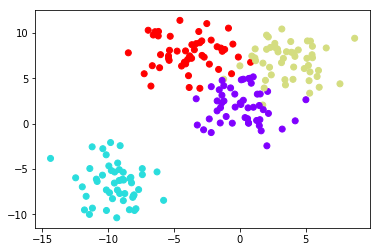

In [12]:
plt.scatter(data[0][:,0],data[0][:,-1],c=data[1],cmap='rainbow')

In [13]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=4)

In [21]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664]])

In [23]:
kmeans.labels_

array([0, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 3,
       3, 1, 0, 1, 1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 2, 0, 3, 1, 3, 3, 0, 2, 3, 1, 0, 3, 3, 0, 2, 1, 2, 1, 0, 2, 3,
       1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 1, 3, 3, 3, 0,
       3, 1, 1, 1, 1, 3, 3, 1, 2, 0, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2, 0, 3, 1, 0, 0, 0,
       3, 1, 1, 0, 2, 0, 2, 3, 1, 2, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 3, 2,
       3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 1, 0, 3, 2, 0, 3, 2, 3, 0, 2, 3, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 1, 3, 2, 2,
       1, 3])

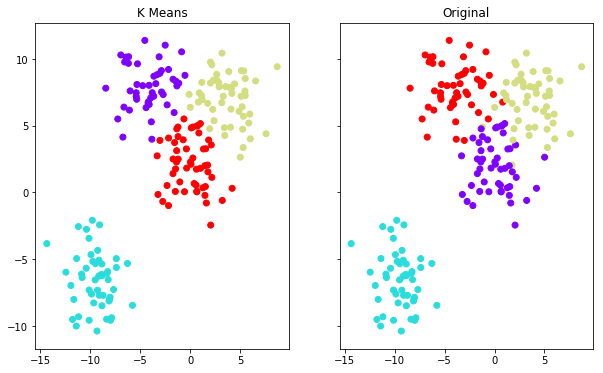

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

Python Code Showing Agglomerative Clustering (Bottom Up Approach)

In [25]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [26]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [27]:
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [28]:
plt.style.use('seaborn-whitegrid')

In [29]:
df= pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Z-Shape: (767, 4)


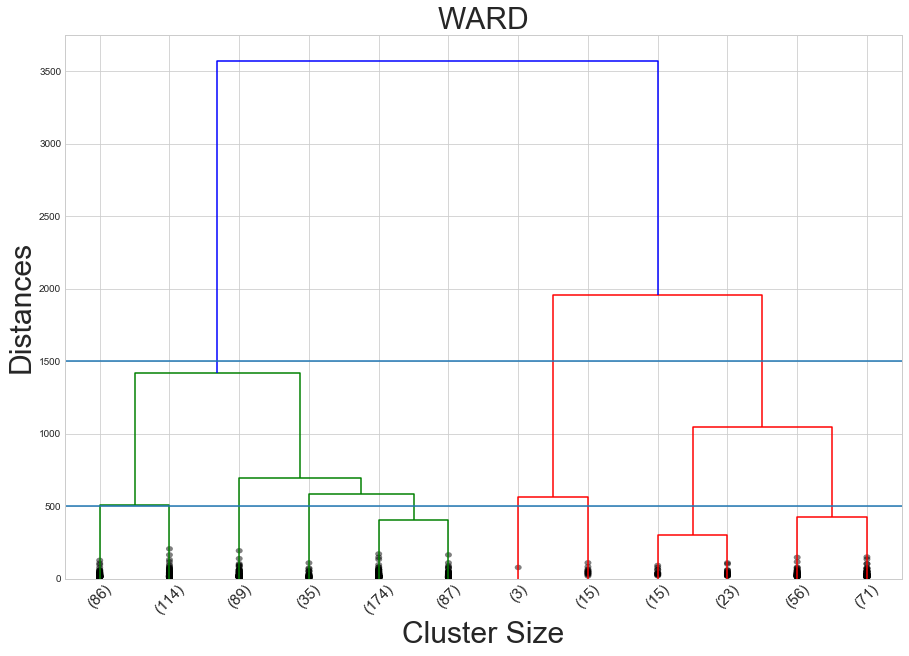

In [30]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='ward')
print("Z-Shape:",Z.shape)
plt.title("WARD",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.axhline(y=500)
plt.axhline(y=1500)
plt.show()

#### Ques3. Explain the Difference between the Silhoutte Score and Linkage Method – “Single”. 

Ans. 
Silhouette refers to a method of interpretation and validation of consistency within clusters of data. 
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

There are several ways to measure the distance between clusters in order to decide the rules for clustering and they are often called Linkage Methods. Some of the common linkage methods are:
Single-linkage: calculates the minimum distance between the clusters before merging. This linkage may be used to detect high values in your dataset which may be outliers as they will be merged at the end.

#### Ques4. Consider the University Dataset with the 777 Rows and 18 Columns. Here, you need to identify the optimum cluster size by using K Means.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.read_csv('_College Data.csv',index_col=0)

In [36]:
df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [38]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(n_clusters=4)

In [60]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
centroids = kmeans.cluster_centers_

In [62]:
centroids

array([[1.07111341e+04, 7.35846341e+03, 2.95760976e+03, 3.21585366e+01,
        6.37195122e+01, 1.55374756e+04, 3.11045122e+03, 8.28236585e+03,
        4.15140244e+03, 5.95500000e+02, 1.87660976e+03, 8.42926829e+01,
        8.97560976e+01, 1.63512195e+01, 1.59512195e+01, 9.49881707e+03,
        6.08902439e+01],
       [1.67909382e+03, 1.20654158e+03, 5.02245203e+02, 2.03454158e+01,
        4.80191898e+01, 2.32546055e+03, 7.21164179e+02, 8.45028145e+03,
        3.95973987e+03, 5.31840085e+02, 1.36672921e+03, 6.56183369e+01,
        7.31321962e+01, 1.50407249e+01, 1.95628998e+01, 7.30658422e+03,
        6.07633262e+01],
       [2.32830097e+03, 1.58846602e+03, 4.92830097e+02, 3.74417476e+01,
        6.68640777e+01, 1.96334951e+03, 3.04563107e+02, 1.50857718e+04,
        5.18160194e+03, 5.68315534e+02, 1.07616505e+03, 8.20582524e+01,
        8.90000000e+01, 1.17500000e+01, 3.14660194e+01, 1.28801165e+04,
        7.57038835e+01],
       [9.34175000e+03, 3.60625000e+03, 1.32195000e+03, 7.605

In [75]:
#Elbow Method - Find the optimal Value of Clusters 
ks = range(1,25)
inertias = []

In [76]:
for k in ks:
    #Define the model 
    model = KMeans(n_clusters=k)
    #Fit the model
    model.fit(df.drop('Private',axis=1))
    #Append the Inertias
    inertias.append(model.inertia_)

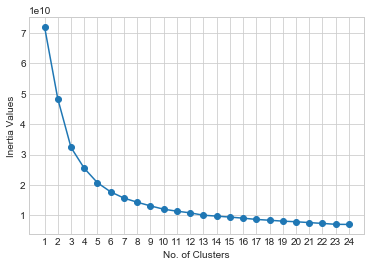

In [77]:
plt.plot(ks,inertias,"-o")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia Values")
plt.xticks(ks)
plt.show()

Optimal No. of Clusters should be 3 in this case. 

#### Ques5. Consider the Titanic Train Set. Generate Clustering Model on the Training Dataset and find the following: 

In [78]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [101]:
df = pd.read_csv("train-1.csv")

In [102]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [104]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
df = df.drop(['Cabin'], axis=1)

In [106]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [107]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [108]:
df['Title'] = df.Name.apply(lambda Name: Name.split(',')[1].split('.')[0].strip())
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked Title  
0      0         A/5 21171   7.2500        S    Mr  
1      0          PC 17599  71.2833        C   Mrs  
2      0  STON/O2. 3101282   7.9250        S  Miss  
3      0            113803  53.1000        S   Mrs  
4      0            373450   8.0500        S    Mr

In [109]:
df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Mme               1
Capt              1
Lady              1
Ms                1
Don               1
Sir               1
the Countess      1
Jonkheer          1
Name: Title, dtype: int64

In [110]:
Title_Age = df.groupby(df['Title']).Age.transform('median')
df.Age.fillna(Title_Age,inplace=True)

In [111]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [113]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Title',axis=1,inplace=True)

In [120]:
df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S

In [121]:
df_final = pd.get_dummies(df,drop_first=True)
df_final.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500         1   
1            2         1       1  38.0      1      0  71.2833         0   
2            3         1       3  26.0      0      0   7.9250         0   
3            4         1       1  35.0      1      0  53.1000         0   
4            5         0       3  35.0      0      0   8.0500         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

#### Kmeans

In [122]:
from sklearn.cluster import KMeans

In [127]:
#Elbow Method - Find the optimal Value of Clusters 
ks = range(1,25)
inertias = []

In [128]:
for k in ks:
    #Define the model 
    model = KMeans(n_clusters=k)
    #Fit the model
    model.fit(df_final.drop('Survived',axis=1))
    #Append the Inertias
    inertias.append(model.inertia_)

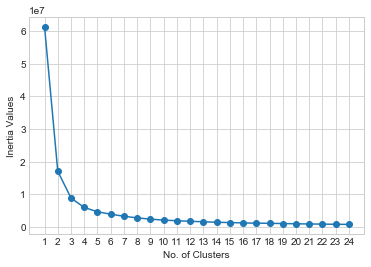

In [129]:
plt.plot(ks,inertias,"-o")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia Values")
plt.xticks(ks)
plt.show()

In [145]:
kmeans = KMeans(n_clusters=2)

In [146]:
kmeans.fit(df_final.drop('Survived',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [147]:
kmeans.cluster_centers_

array([[2.23500000e+02, 2.34080717e+00, 2.83817265e+01, 5.87443946e-01,
        3.94618834e-01, 3.24868262e+01, 6.16591928e-01, 9.64125561e-02,
        7.21973094e-01],
       [6.69000000e+02, 2.27640449e+00, 3.04009438e+01, 4.58426966e-01,
        3.68539326e-01, 3.19209546e+01, 6.78651685e-01, 7.64044944e-02,
        7.28089888e-01]])

In [148]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [159]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df_final['Survived'],kmeans.labels_))
print(classification_report(df_final['Survived'],kmeans.labels_))

[[271 278]
 [175 167]]
              precision    recall  f1-score   support

           0       0.61      0.49      0.54       549
           1       0.38      0.49      0.42       342

   micro avg       0.49      0.49      0.49       891
   macro avg       0.49      0.49      0.48       891
weighted avg       0.52      0.49      0.50       891



#### Agglomerative Clustering

In [151]:
import scipy.cluster.hierarchy as sch

In [152]:
sch.linkage(df_final,method="ward")#ward minimizes the wcss

array([[3.58000000e+02, 3.59000000e+02, 1.00000000e+00, 2.00000000e+00],
       [7.33000000e+02, 7.34000000e+02, 1.00000000e+00, 2.00000000e+00],
       [7.38000000e+02, 7.39000000e+02, 1.00000000e+00, 2.00000000e+00],
       ...,
       [1.77300000e+03, 1.77400000e+03, 2.17065587e+03, 3.38000000e+02],
       [1.77600000e+03, 1.77700000e+03, 4.55562367e+03, 5.53000000e+02],
       [1.77800000e+03, 1.77900000e+03, 9.10569440e+03, 8.91000000e+02]])

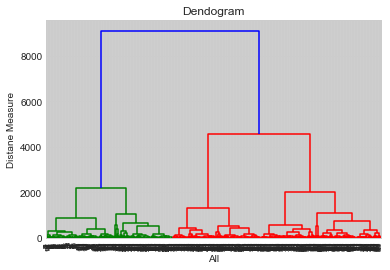

In [153]:
dendogram = sch.dendrogram(sch.linkage(df_final,method="ward"))
plt.title("Dendogram")
plt.xlabel("All")
plt.ylabel("Distane Measure")
plt.show()

In [154]:
from sklearn.cluster import AgglomerativeClustering

In [155]:
model_h = AgglomerativeClustering(n_clusters=2,linkage="ward")

In [160]:
model_h.fit(df_final.drop('Survived',axis=1))

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [162]:
model_h.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [163]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df_final['Survived'],model_h.labels_))
print(classification_report(df_final['Survived'],model_h.labels_))

[[342 207]
 [211 131]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       549
           1       0.39      0.38      0.39       342

   micro avg       0.53      0.53      0.53       891
   macro avg       0.50      0.50      0.50       891
weighted avg       0.53      0.53      0.53       891



In this case, Agglomerative clustering does the better job as f1 score is higher.  

#### Ques6. Kaggle Competion Digit Recogonizer Problem

In [187]:
#Import the Data Set
df = pd.read_csv("MNIST_Data.csv")

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [189]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [190]:
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X = df.drop('label', axis=1)
y = df['label']


In [193]:
train_img, test_img, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


Without using PCA 

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
logisticRegr = LogisticRegression()

In [197]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [198]:
pred_lg = logisticRegr.predict(test_img)

In [199]:
from sklearn.metrics import accuracy_score

In [200]:
accuracy_score(test_lbl,pred_lg)*100

90.91666666666667

Without Applying PCA, Logistic Regression Model Accuracy is 90.91% 

PCA 

In [174]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95) #.95 is used for the number of components parameter. It means it uses minimum number of components 
               # such that  95% of the variance is obtained. 

In [175]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [176]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

Using PCA & Logistic Regression

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
logisticRegr = LogisticRegression()

In [179]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [181]:
pred_lg = logisticRegr.predict(test_img)

In [183]:
from sklearn.metrics import accuracy_score

In [184]:
accuracy_score(test_lbl,pred_lg)*100

91.4

Result: After Applying PCA, and LogisticRegression Model Accuracy comes increased to 91.4%. It using less number of columns while giving more accuracy. 